In [1]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=ae7672f9825050b76f947ef64269723272f7ba2814fab00273f9c8657e369991
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=5e75cf2bb5b2de92a55788e18e89f9013f15d7f2ca3fa2dc09289d2a8ecbd4a0
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from fancyimpute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score, recall_score, classification_report ,cohen_kappa_score, confusion_matrix, roc_curve, roc_auc_score

In [3]:
df = pd.read_csv("weatherAUS.csv")

In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
missing_values_percent = df.isnull().mean()*100
missing_values_percent

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

# Missing values

<Axes: >

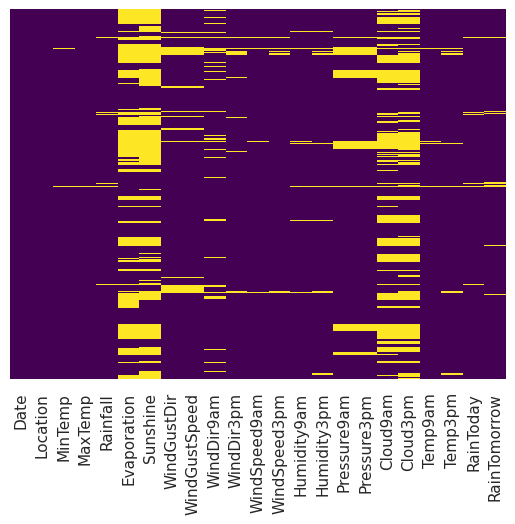

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

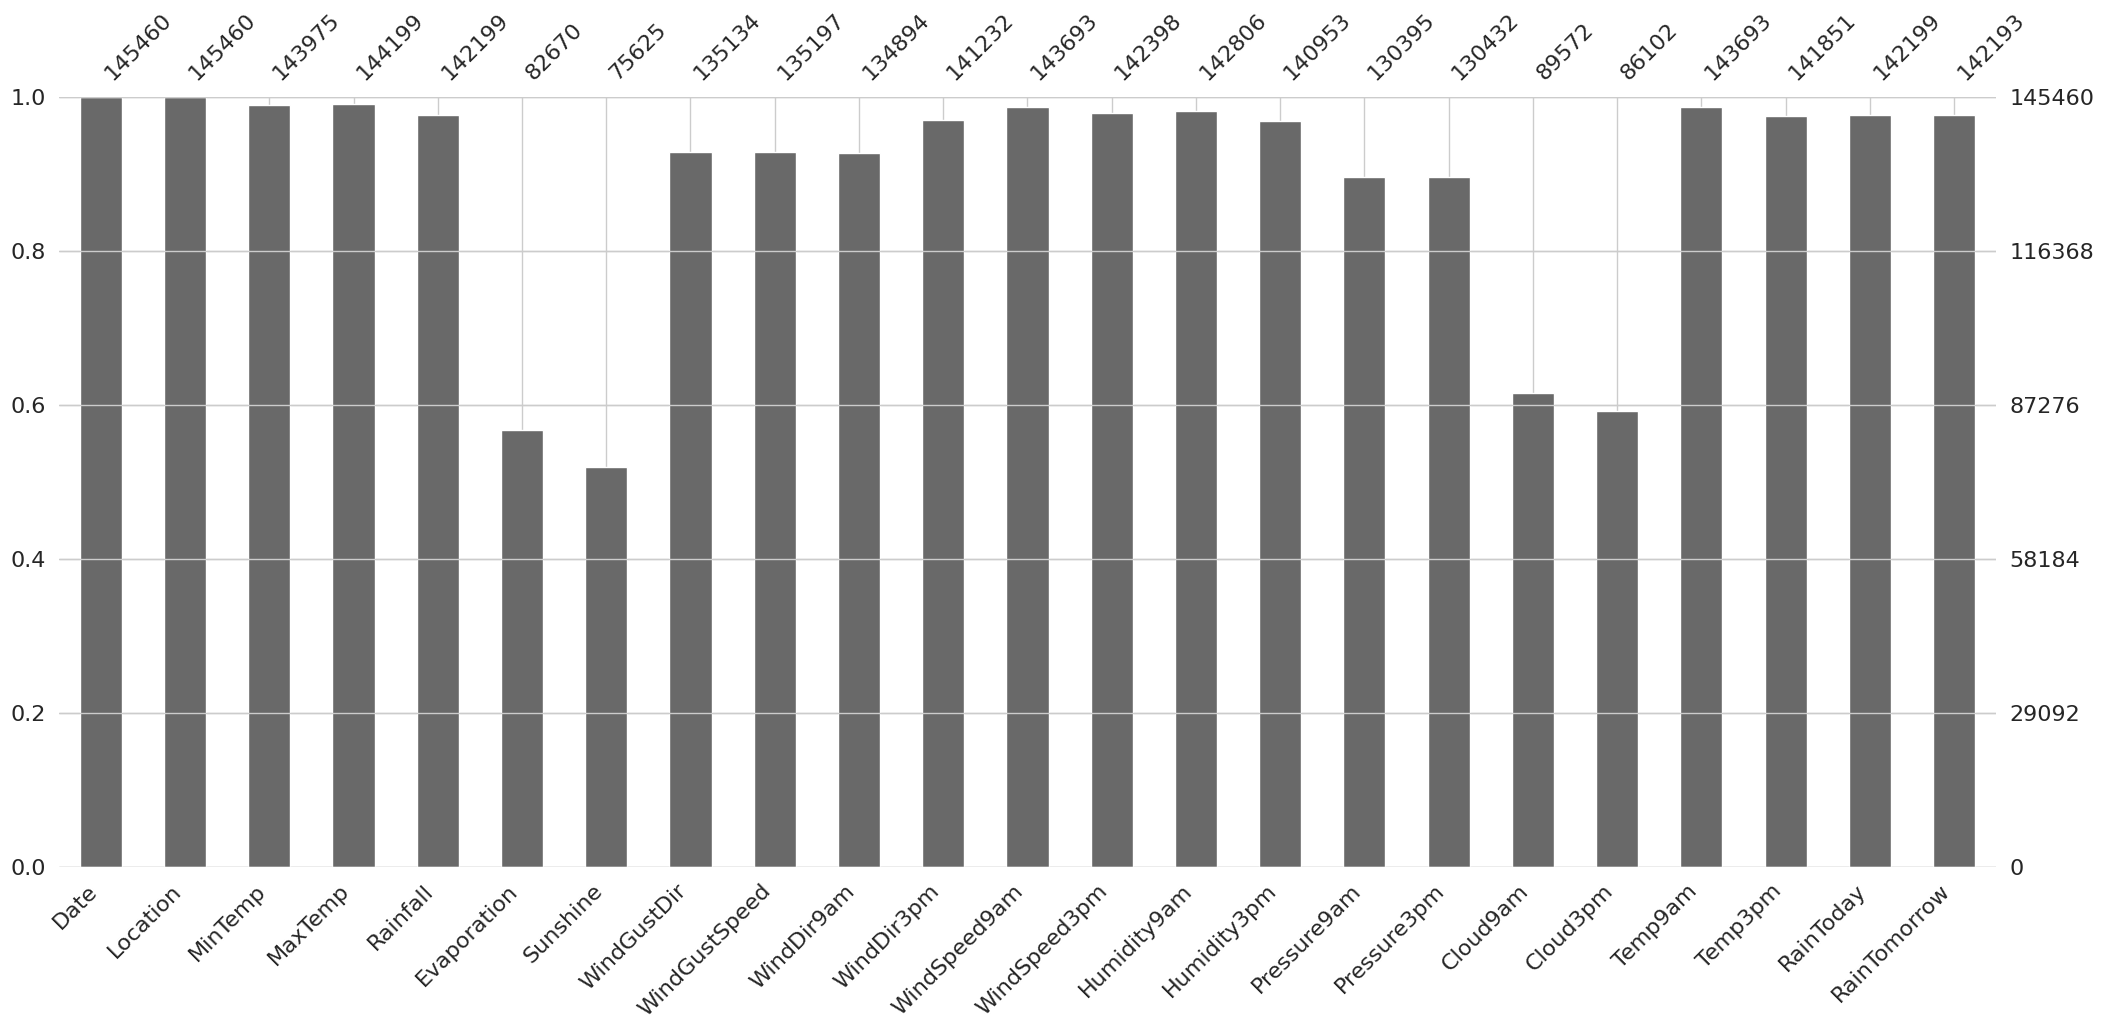

In [9]:
missingno.bar(df)

# Data Preprocessing

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
#Adding extra columns by splitting date column
df['Year']=[d.split('-')[0] for d in df.Date]
df['Year'].astype(float)
df['Month']=[d.split('-')[1] for d in df.Date]
df['Day']=[d.split('-')[2] for d in df.Date]
df.drop(columns=["Date"], axis=1, inplace=True)

In [12]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
categorical_columns=['Location']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [13]:
# Define custom mapping for ordinal encoding
mapping = {
    'No': 0,'Yes': 1,'nan':'nan'
}

# Apply ordinal encoding to specific columns
ordinal_columns=['RainToday','RainTomorrow']
for col in ordinal_columns:
    df[col] = df[col].map(mapping)
    # Convert values to numeric, leaving 'nan' values as is
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
# Define custom mapping for ordinal encoding
mapping = {
    'W': 0,'WNW': 1,'WSW': 2,'NE': 3,'NNW': 4,'N': 5,'NNE':6,'SW':7,'ENE':8,'SSE':9,'S':10,'NW':11,'SE':12,'ESE':13,'E':14,'SSW':15,'nan':'nan'
}

# Apply ordinal encoding to specific columns
ordinal_columns=['WindGustDir','WindDir9am','WindDir3pm']
for col in ordinal_columns:
    df[col] = df[col].map(mapping)
    # Convert values to numeric, leaving 'nan' values as is
    df[col] = pd.to_numeric(df[col], errors='coerce')



In [15]:
dt_acc=[]
rf_acc=[]
log_acc=[]

In [16]:
df_without_imputation=df.dropna()

In [17]:
df_without_imputation.shape

(56420, 25)

In [18]:
x=df_without_imputation.drop(['RainTomorrow'],axis=1)
y=df_without_imputation['RainTomorrow']

In [19]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, train_size=0.70, random_state=2, )
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(39494, 24)
(16926, 24)
(39494,)
(16926,)


In [20]:
scaler = StandardScaler()
scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

Accuracy: 0.8531253692544015


Cohen's Kappa Score: 0.5290723855347385


              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     13188
         1.0       0.73      0.54      0.62      3738

    accuracy                           0.85     16926
   macro avg       0.80      0.74      0.76     16926
weighted avg       0.84      0.85      0.84     16926





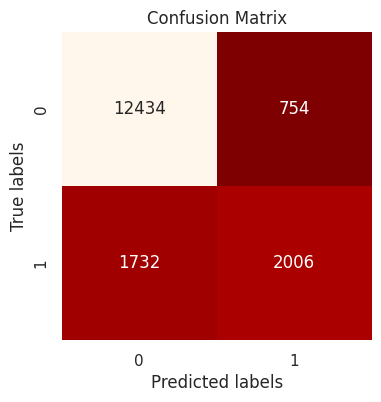

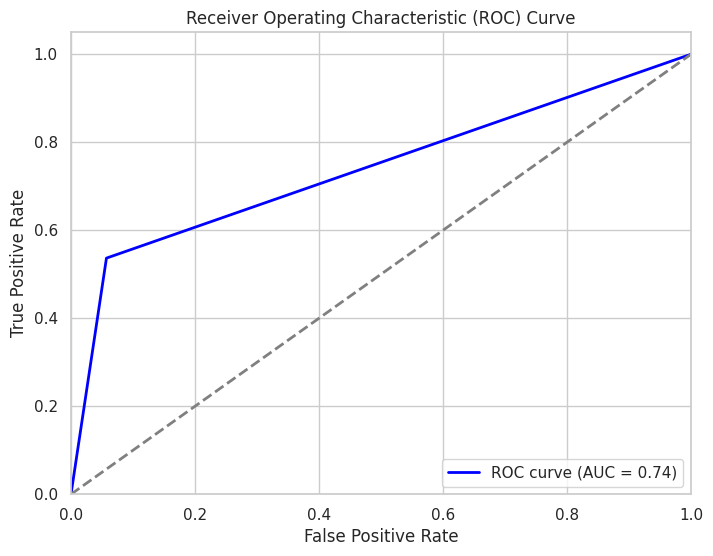

In [21]:
lr = LogisticRegression(solver='liblinear')
lr.fit(XtrainSTD, ytrain.values.ravel())
ypred = lr.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
print("Accuracy:",accuracy)
log_acc.append(accuracy)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)

print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.8655323171452204


Cohen's Kappa Score: 0.56470972359057


              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     13188
         1.0       0.77      0.55      0.64      3738

    accuracy                           0.87     16926
   macro avg       0.83      0.75      0.78     16926
weighted avg       0.86      0.87      0.86     16926





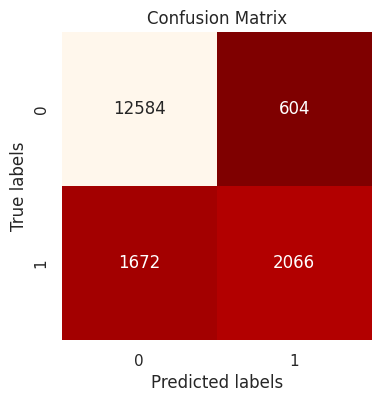

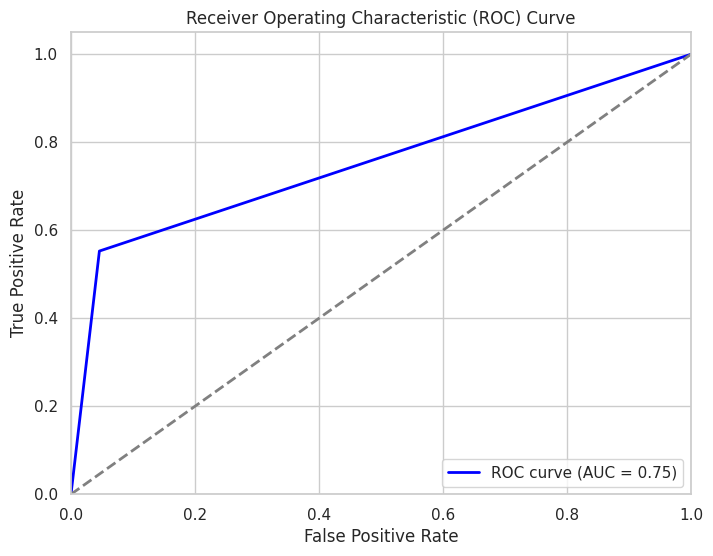

In [22]:
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', min_samples_split= 4, n_estimators= 200, random_state=0)
rf.fit(XtrainSTD, ytrain.values.ravel())
ypred = rf.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
print("Accuracy:",accuracy)
rf_acc.append(accuracy)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)


print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.804265626846272


Cohen's Kappa Score: 0.56470972359057


              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     13188
         1.0       0.77      0.55      0.64      3738

    accuracy                           0.87     16926
   macro avg       0.83      0.75      0.78     16926
weighted avg       0.86      0.87      0.86     16926





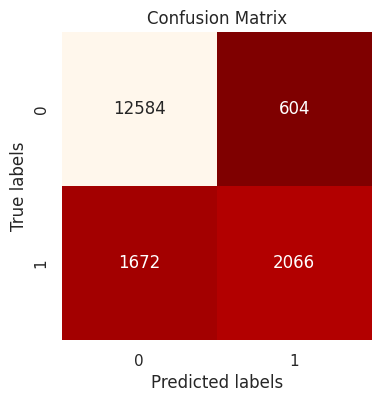

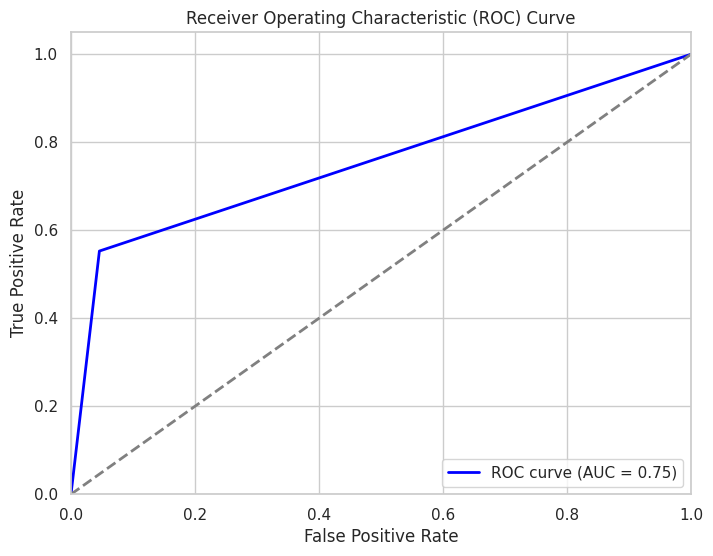

In [23]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=0)
dt.fit(XtrainSTD, ytrain.values.ravel())
ypred_dt = dt.predict(XtestSTD)
accuracy_dt = accuracy_score(ytest, ypred_dt)
print("Accuracy:", accuracy_dt)
dt_acc.append(accuracy_dt)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)

print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Applying imputation

# 1.Hot deck imputation

In [24]:
df_with_hot_deck_imputation=df.copy()

In [25]:
%%timeit
for i, row in df_with_hot_deck_imputation.iterrows():
    if row.isnull().any():
        neighbour = df_with_hot_deck_imputation.iloc[max(i-3, 0):min(i+3, len(df_with_hot_deck_imputation))].dropna()
        if not neighbour.empty:
            for col in df_with_hot_deck_imputation.columns:
                if pd.isnull(row[col]):
                    df_with_hot_deck_imputation.at[i, col] = neighbour.sample(1)[col].values[0]

30.9 s ± 3.31 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
df_with_hot_deck_imputation.isnull().sum()

Location            0
MinTemp            47
MaxTemp            40
Rainfall          110
Evaporation      6033
Sunshine         6033
WindGustDir       108
WindGustSpeed     108
WindDir9am        957
WindDir3pm        131
WindSpeed9am       58
WindSpeed3pm       59
Humidity9am        63
Humidity3pm        63
Pressure9am       173
Pressure3pm       181
Cloud9am         4744
Cloud3pm         4606
Temp9am            50
Temp3pm            52
RainToday         110
RainTomorrow      110
Year                0
Month               0
Day                 0
dtype: int64

<Axes: >

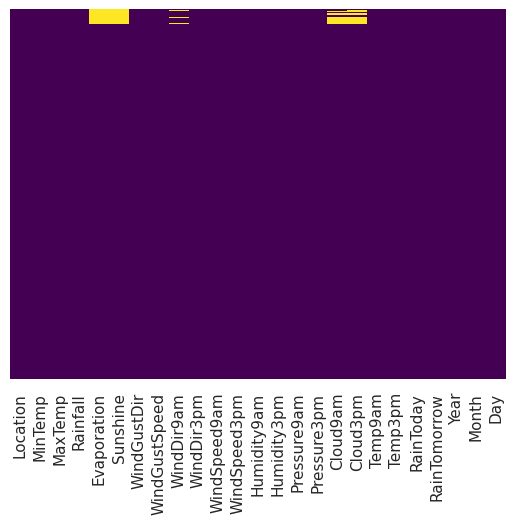

In [27]:
sns.heatmap(df_with_hot_deck_imputation.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# KNN imputation

In [28]:
df_with_knn_imputation=pd.read_csv("dataset_knn.csv")

In [29]:
df_with_knn_imputation['Year']=[d.split('-')[0] for d in df_with_knn_imputation.Date]
df_with_knn_imputation['Year'].astype(float)
df_with_knn_imputation['Month']=[d.split('-')[1] for d in df_with_knn_imputation.Date]
df_with_knn_imputation['Day']=[d.split('-')[2] for d in df_with_knn_imputation.Date]
df_with_knn_imputation.drop(columns=["Date"], axis=1, inplace=True)
# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
categorical_columns=['Location']
for col in categorical_columns:
    df_with_knn_imputation[col] = le.fit_transform(df_with_knn_imputation[col])

# Define custom mapping for ordinal encoding
mapping = {
    'No': 0,'Yes': 1,'nan':'nan'
}

# Apply ordinal encoding to specific columns
ordinal_columns=['RainToday','RainTomorrow']
for col in ordinal_columns:
    df_with_knn_imputation[col] = df_with_knn_imputation[col].map(mapping)
    # Convert values to numeric, leaving 'nan' values as is
    df_with_knn_imputation[col] = pd.to_numeric(df_with_knn_imputation[col], errors='coerce')

# Define custom mapping for ordinal encoding
mapping = {
    'W': 0,'WNW': 1,'WSW': 2,'NE': 3,'NNW': 4,'N': 5,'NNE':6,'SW':7,'ENE':8,'SSE':9,'S':10,'NW':11,'SE':12,'ESE':13,'E':14,'SSW':15,'nan':'nan'
}

# Apply ordinal encoding to specific columns
ordinal_columns=['WindGustDir','WindDir9am','WindDir3pm']
for col in ordinal_columns:
    df_with_knn_imputation[col] = df_with_knn_imputation[col].map(mapping)
    # Convert values to numeric, leaving 'nan' values as is
    df_with_knn_imputation[col] = pd.to_numeric(df_with_knn_imputation[col], errors='coerce')

In [30]:
imputer = KNNImputer(n_neighbors=2)
data_imputed = imputer.fit_transform(df_with_knn_imputation)
df_with_knn_imputation = pd.DataFrame(data_imputed, columns=df.columns)

In [31]:
df_with_knn_imputation.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

<Axes: >

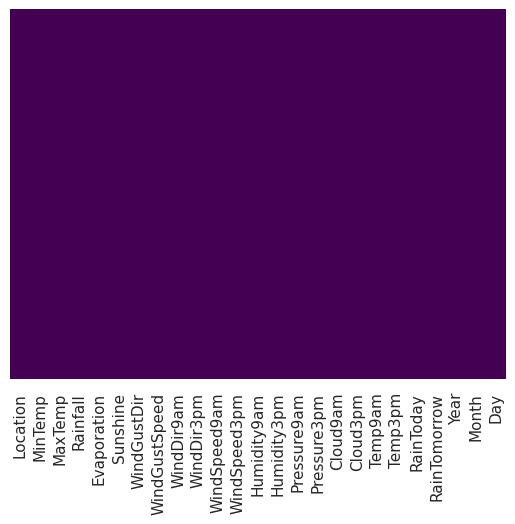

In [32]:
sns.heatmap(df_with_knn_imputation.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
x=df_with_knn_imputation.drop(['RainTomorrow'],axis=1)
df_with_knn_imputation['RainTomorrow'] = df_with_knn_imputation['RainTomorrow'].apply(lambda x: 1 if x >= 0.5 else 0)
y=df_with_knn_imputation['RainTomorrow']

In [34]:
y.value_counts()

RainTomorrow
0    9569
1    3170
Name: count, dtype: int64

<Axes: ylabel='count'>

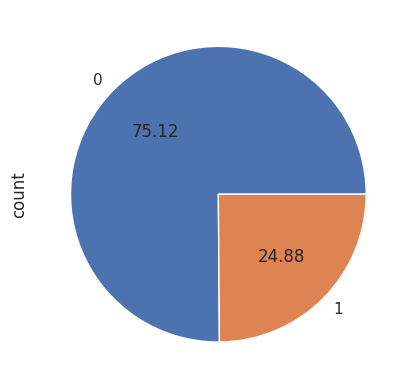

In [35]:
y.value_counts().plot.pie(autopct='%.2f')

In [36]:
x=df_with_knn_imputation.drop(['RainTomorrow'],axis=1).round(0)
y=df_with_knn_imputation['RainTomorrow'].round(0)
smote = SMOTE(sampling_strategy='auto')
x_res,y_res= smote.fit_resample(x, y)

<Axes: ylabel='count'>

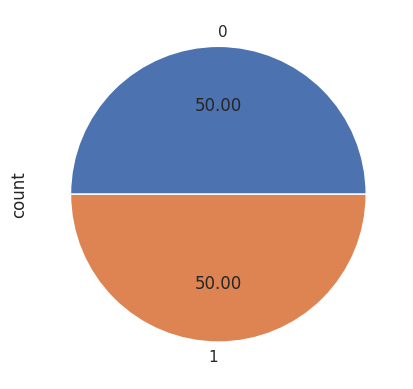

In [37]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_res, y_res, train_size=0.70, random_state=2, )
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(13396, 24)
(5742, 24)
(13396,)
(5742,)


In [39]:
scaler = StandardScaler()
scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

Accuracy: 0.7687216997561825


Cohen's Kappa Score: 0.5375403502681648


              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2847
           1       0.78      0.75      0.77      2895

    accuracy                           0.77      5742
   macro avg       0.77      0.77      0.77      5742
weighted avg       0.77      0.77      0.77      5742





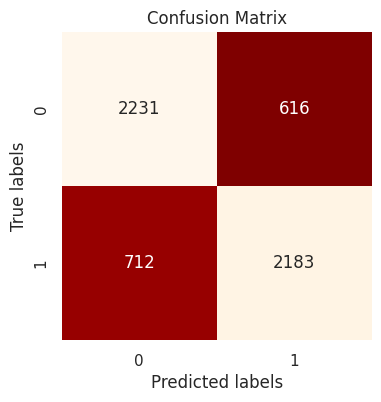

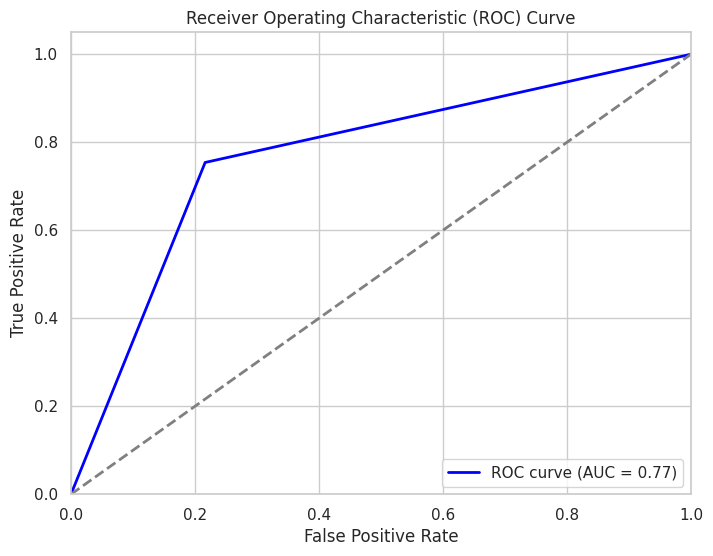

In [40]:
lr = LogisticRegression(solver='liblinear')
lr.fit(XtrainSTD, ytrain.values.ravel())
ypred = lr.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
print("Accuracy:",accuracy)
log_acc.append(accuracy)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)


print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.8183559735283873


Cohen's Kappa Score: 0.5375403502681648


              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2847
           1       0.78      0.75      0.77      2895

    accuracy                           0.77      5742
   macro avg       0.77      0.77      0.77      5742
weighted avg       0.77      0.77      0.77      5742





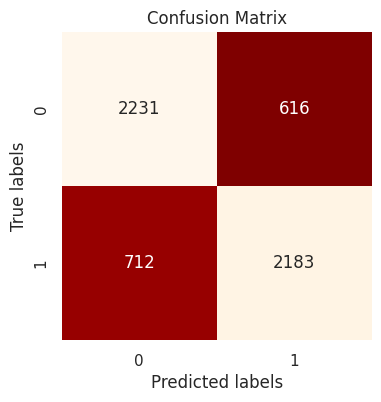

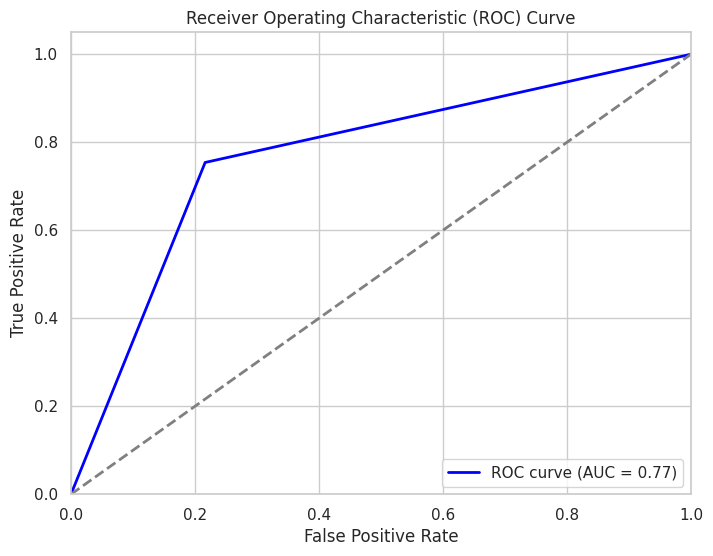

In [41]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=0)
dt.fit(XtrainSTD, ytrain.values.ravel())
ypred_dt = dt.predict(XtestSTD)
accuracy_dt = accuracy_score(ytest, ypred_dt)
print("Accuracy:", accuracy_dt)
dt_acc.append(accuracy_dt)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)


print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9061302681992337


Cohen's Kappa Score: 0.8123015253550847


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2847
           1       0.92      0.89      0.91      2895

    accuracy                           0.91      5742
   macro avg       0.91      0.91      0.91      5742
weighted avg       0.91      0.91      0.91      5742





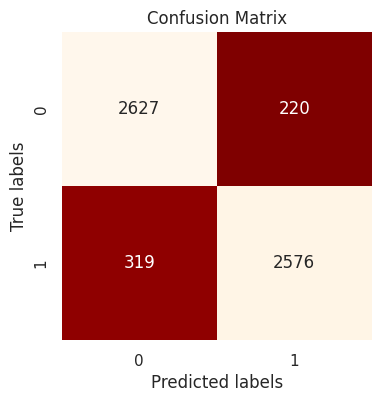

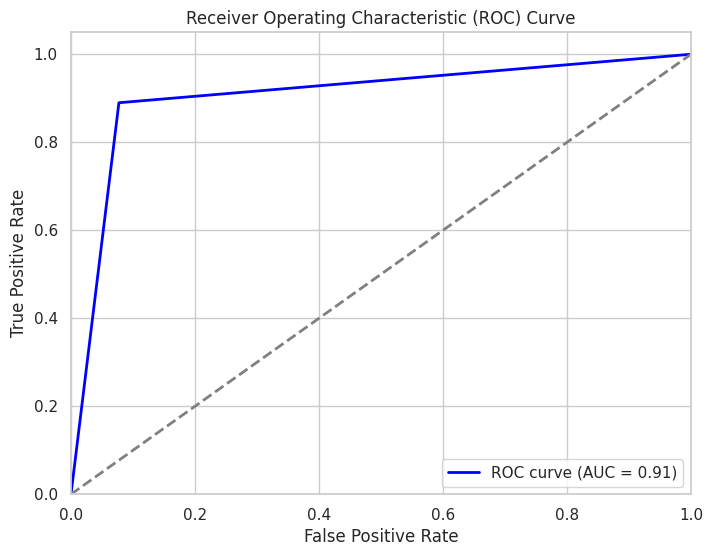

In [42]:
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', min_samples_split= 4, n_estimators= 200, random_state=0)
rf.fit(XtrainSTD, ytrain.values.ravel())
ypred = rf.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
print("Accuracy:",accuracy)
rf_acc.append(accuracy)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)

print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 3.Linear Interpolation

In [43]:
df_with_linear_interpolation_imputation=df.copy()

In [44]:
df_with_linear_interpolation_imputation['date_column'] = pd.to_datetime(df_with_linear_interpolation_imputation[['Year', 'Month', 'Day']])
df_with_linear_interpolation_imputation.sort_values(by='date_column', inplace=True)
df_with_linear_interpolation_imputation.set_index('date_column', inplace=True)
df_with_linear_interpolation_imputation.interpolate(method='linear', inplace=True)
df_with_linear_interpolation_imputation.reset_index(inplace=True)
df_with_linear_interpolation_imputation.drop('date_column', axis=1, inplace=True)

In [45]:
df_with_linear_interpolation_imputation.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

<Axes: >

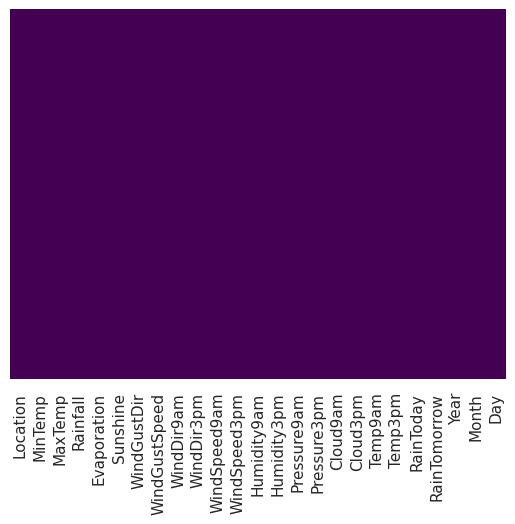

In [46]:
sns.heatmap(df_with_linear_interpolation_imputation.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
x=df_with_linear_interpolation_imputation.drop(['RainTomorrow'],axis=1)
df_with_linear_interpolation_imputation['RainTomorrow'] = df_with_linear_interpolation_imputation['RainTomorrow'].apply(lambda x: 1 if x >= 0.5 else 0)
y=df_with_linear_interpolation_imputation['RainTomorrow']

In [48]:
y.value_counts()

RainTomorrow
0    112345
1     33115
Name: count, dtype: int64

<Axes: ylabel='count'>

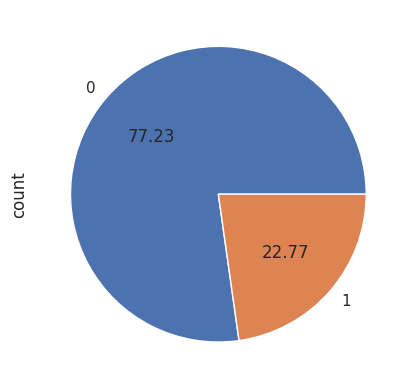

In [49]:
y.value_counts().plot.pie(autopct='%.2f')

In [50]:
x=df_with_linear_interpolation_imputation.drop(['RainTomorrow'],axis=1).round(0)
y=df_with_linear_interpolation_imputation['RainTomorrow'].round(0)
smote = SMOTE(sampling_strategy='auto')
x_res,y_res= smote.fit_resample(x, y)

<Axes: ylabel='count'>

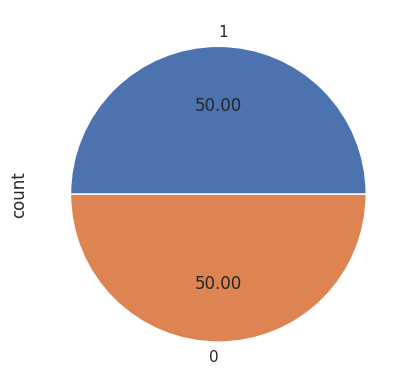

In [51]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_res, y_res, train_size=0.70, random_state=2, )
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(157283, 24)
(67407, 24)
(157283,)
(67407,)


In [53]:
scaler = StandardScaler()
scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

Accuracy: 0.7766404082662038


Cohen's Kappa Score: 0.553286705490336


              precision    recall  f1-score   support

           0       0.77      0.79      0.78     33682
           1       0.78      0.77      0.77     33725

    accuracy                           0.78     67407
   macro avg       0.78      0.78      0.78     67407
weighted avg       0.78      0.78      0.78     67407





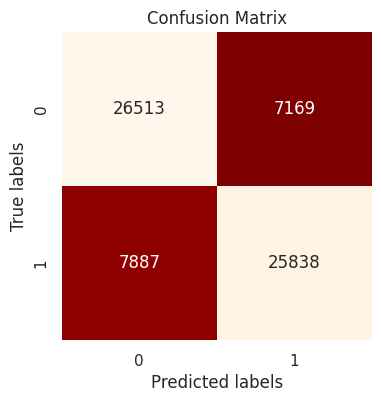

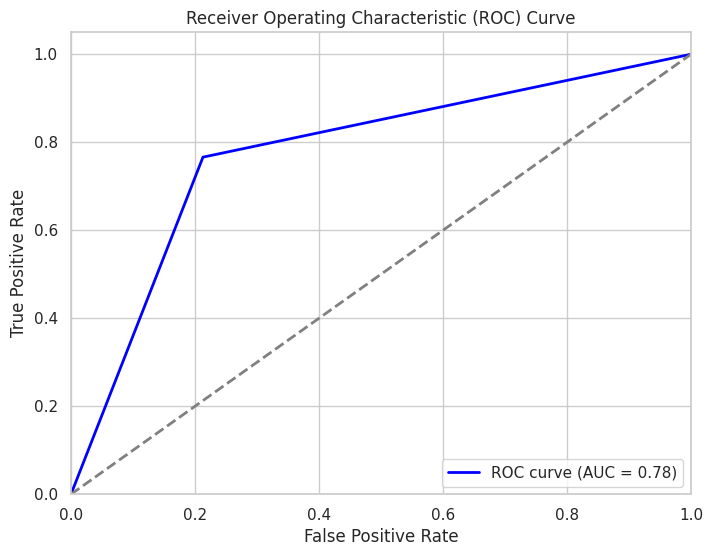

In [54]:
lr = LogisticRegression(solver='liblinear')
lr.fit(XtrainSTD, ytrain.values.ravel())
ypred = lr.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
print("Accuracy:",accuracy)
log_acc.append(accuracy)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)

print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.8425089382408355


Cohen's Kappa Score: 0.553286705490336


              precision    recall  f1-score   support

           0       0.77      0.79      0.78     33682
           1       0.78      0.77      0.77     33725

    accuracy                           0.78     67407
   macro avg       0.78      0.78      0.78     67407
weighted avg       0.78      0.78      0.78     67407





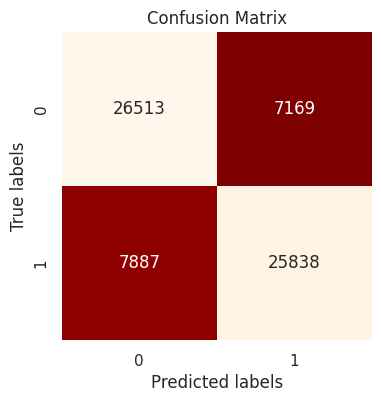

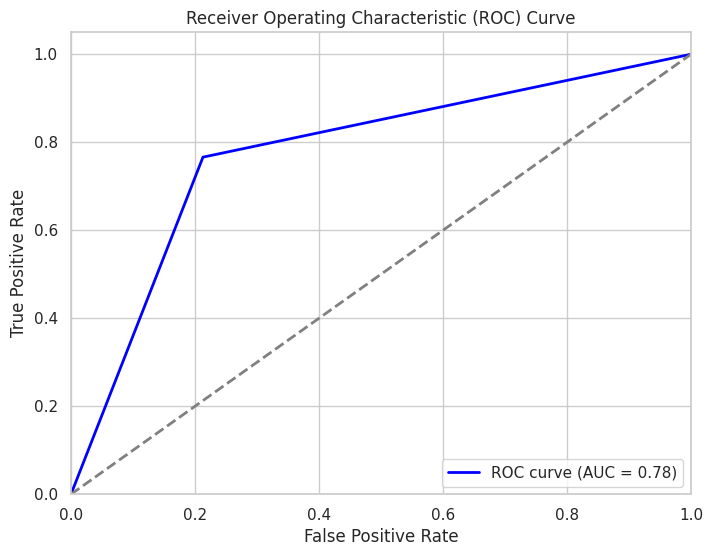

In [55]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=0)
dt.fit(XtrainSTD, ytrain.values.ravel())
ypred_dt = dt.predict(XtestSTD)
accuracy_dt = accuracy_score(ytest, ypred_dt)
print("Accuracy:", accuracy_dt)
dt_acc.append(accuracy_dt)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)

print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9123236459121457


Cohen's Kappa Score: 0.8246517673164148


              precision    recall  f1-score   support

           0       0.90      0.93      0.91     33682
           1       0.93      0.89      0.91     33725

    accuracy                           0.91     67407
   macro avg       0.91      0.91      0.91     67407
weighted avg       0.91      0.91      0.91     67407





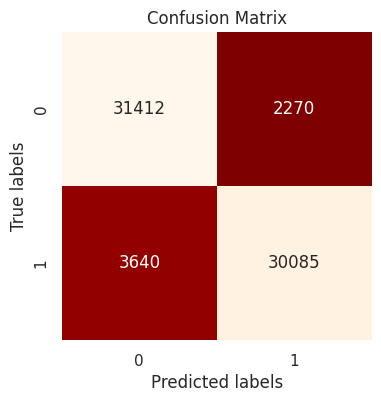

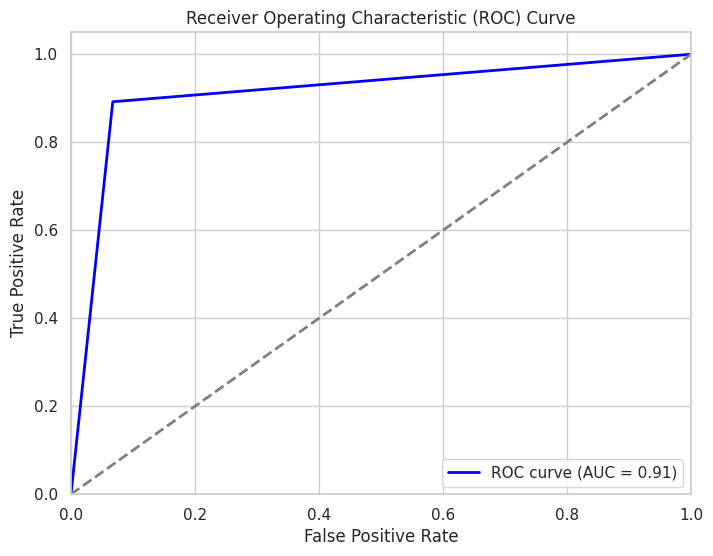

In [56]:
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', min_samples_split= 4, n_estimators= 200, random_state=0)
rf.fit(XtrainSTD, ytrain.values.ravel())
ypred = rf.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
print("Accuracy:",accuracy)
rf_acc.append(accuracy)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)

print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# MICE imputation

In [57]:
df_with_mice_imputation=df.copy()

In [58]:
imputer = IterativeImputer()
df_with_mice_imputation = imputer.fit_transform(df_with_mice_imputation)
df_with_mice_imputation = pd.DataFrame(df_with_mice_imputation, columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [59]:
df_with_mice_imputation.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

<Axes: >

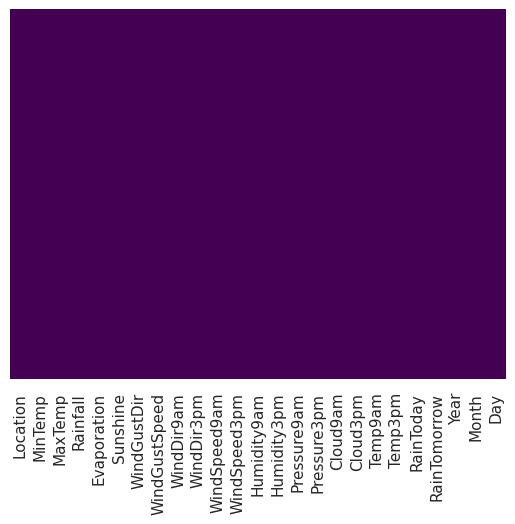

In [60]:
sns.heatmap(df_with_mice_imputation.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [61]:
x=df_with_mice_imputation.drop(['RainTomorrow'],axis=1)
df_with_mice_imputation['RainTomorrow'] = df_with_mice_imputation['RainTomorrow'].apply(lambda x: 1 if x >= 0.5 else 0)
y=df_with_mice_imputation['RainTomorrow']

In [62]:
y.value_counts()

RainTomorrow
0    112990
1     32470
Name: count, dtype: int64

<Axes: ylabel='count'>

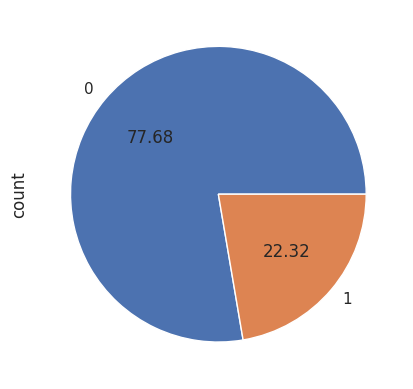

In [63]:
y.value_counts().plot.pie(autopct='%.2f')

In [64]:
x=df_with_mice_imputation.drop(['RainTomorrow'],axis=1).round(0)
y=df_with_mice_imputation['RainTomorrow'].round(0)
smote = SMOTE(sampling_strategy='auto')
x_res,y_res= smote.fit_resample(x, y)

<Axes: ylabel='count'>

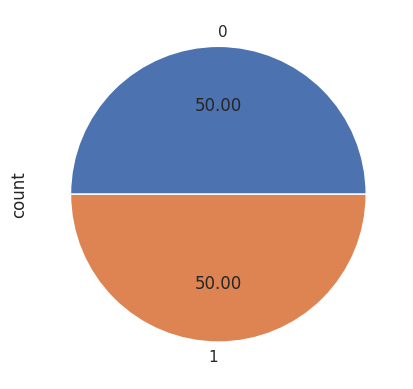

In [65]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [66]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_res, y_res, train_size=0.70, random_state=2, )
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(158186, 24)
(67794, 24)
(158186,)
(67794,)


In [67]:
scaler = StandardScaler()
scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

Accuracy: 0.8105437059326784


Cohen's Kappa Score: 0.6211030504254798


              precision    recall  f1-score   support

           0       0.81      0.82      0.81     33741
           1       0.82      0.80      0.81     34053

    accuracy                           0.81     67794
   macro avg       0.81      0.81      0.81     67794
weighted avg       0.81      0.81      0.81     67794





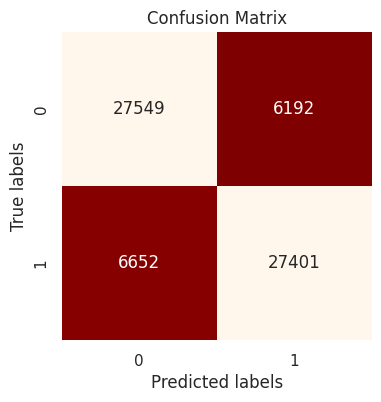

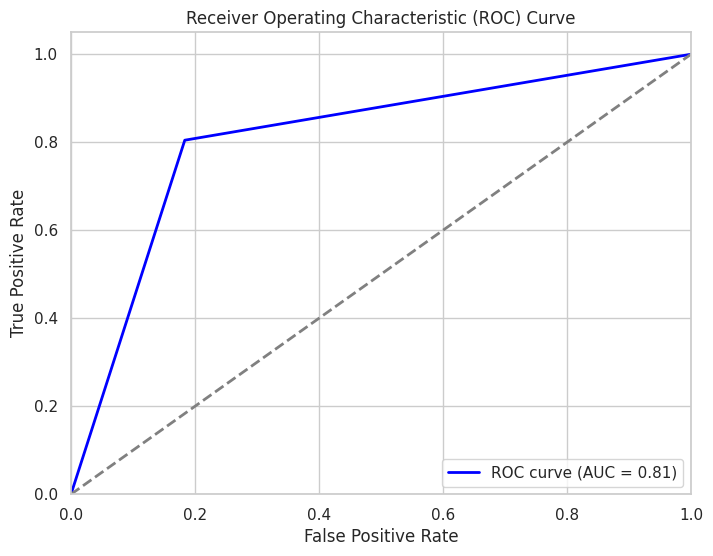

In [68]:
lr = LogisticRegression(solver='liblinear')
lr.fit(XtrainSTD, ytrain.values.ravel())
ypred = lr.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
print("Accuracy:",accuracy)
log_acc.append(accuracy)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)

print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.884031035194855


Cohen's Kappa Score: 0.6211030504254798


              precision    recall  f1-score   support

           0       0.81      0.82      0.81     33741
           1       0.82      0.80      0.81     34053

    accuracy                           0.81     67794
   macro avg       0.81      0.81      0.81     67794
weighted avg       0.81      0.81      0.81     67794





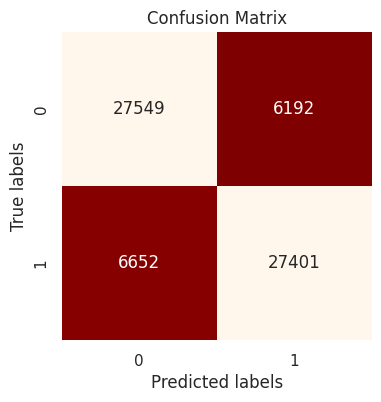

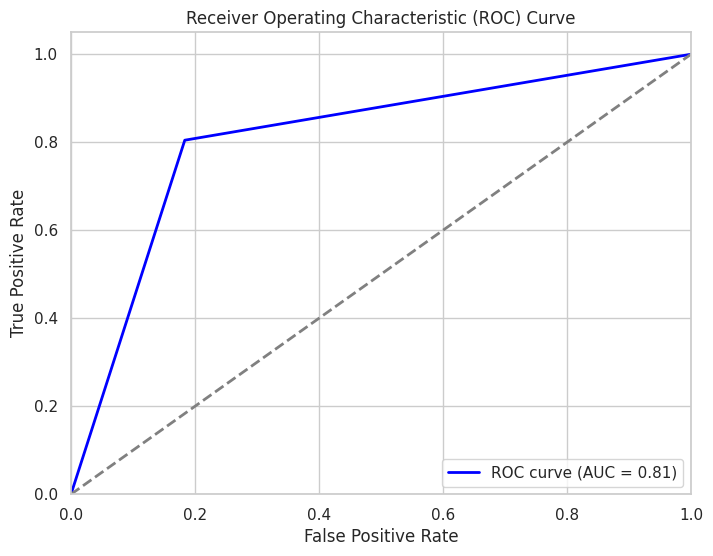

In [69]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=0)
dt.fit(XtrainSTD, ytrain.values.ravel())
ypred_dt = dt.predict(XtestSTD)
accuracy_dt = accuracy_score(ytest, ypred_dt)
print("Accuracy:", accuracy_dt)
dt_acc.append(accuracy_dt)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)

print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9326046552792282


Cohen's Kappa Score: 0.8652227966467892


              precision    recall  f1-score   support

           0       0.92      0.95      0.93     33741
           1       0.94      0.92      0.93     34053

    accuracy                           0.93     67794
   macro avg       0.93      0.93      0.93     67794
weighted avg       0.93      0.93      0.93     67794





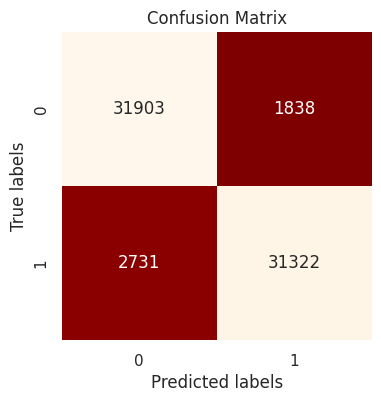

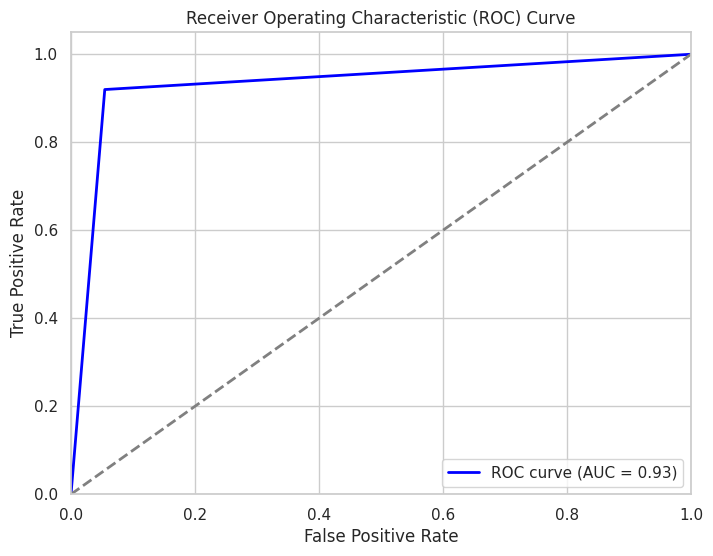

In [70]:
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', min_samples_split= 4, n_estimators= 200, random_state=0)
rf.fit(XtrainSTD, ytrain.values.ravel())
ypred = rf.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
print("Accuracy:",accuracy)
rf_acc.append(accuracy)
print("\n")
kappa = cohen_kappa_score(ytest, ypred)
print("Cohen's Kappa Score:", kappa)
print("\n")
report = classification_report(ytest, ypred)
print(report)

print("\n")
cm = confusion_matrix(ytest, ypred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="OrRd_r", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print("\n")
fpr, tpr, thresholds = roc_curve(ytest, ypred)

# Calculate AUC score
auc = roc_auc_score(ytest, ypred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

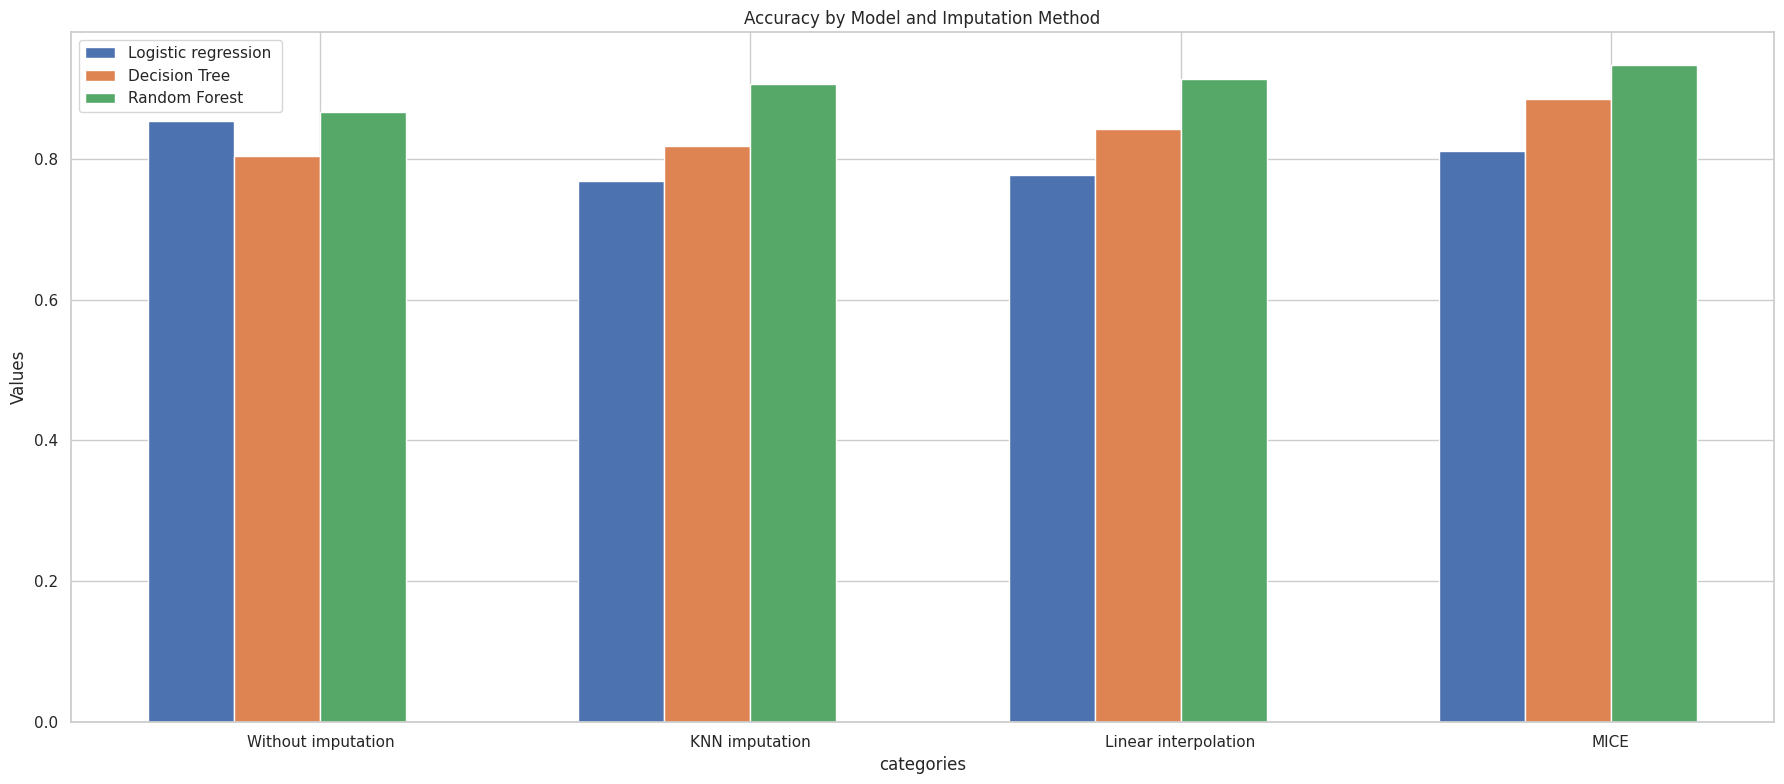

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dt_acc, rf_acc, and svm_acc are defined elsewhere in your code

# 2D List (3x4)
data = [
    log_acc,
    dt_acc,
    rf_acc,
]
# Categories
categories = ['Without imputation', 'KNN imputation', 'Linear interpolation', 'MICE']

# Labels for the legend
legend_labels = ['Logistic regression ', 'Decision Tree', 'Random Forest']

# Plotting
x = np.arange(len(categories))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(18,8 ))

for i, row in enumerate(data):
    plt.bar(x + i * width, row, width=width, label=legend_labels[i])
    for j, value in enumerate(row):
        #formatted_value = "{:.1f}".format(value * 100)  # Format value to have one decimal place and multiply by 100
        #plt.text(x[j] + i * width, value + 0.5, formatted_value, ha='center', va='top')
        pass

plt.xlabel('categories')
plt.ylabel('Values')
plt.title('Accuracy by Model and Imputation Method')
plt.xticks(x + width * 1.5, categories)  # Adjusting the position of ticks
plt.legend()
plt.tight_layout()
plt.show()
